# Assignment: Consequences of Linear Momentum - Modeling Systems

* This assignment is intended to get you started on deducing the consequencs of the principle of linear momentum.

* Save this file in your Institutional G-Suite google drive and rename it starting with your index number. For example if you are E/90/512 then rename the file to
'E90512_Assignment#2_LinearMomentumConservation.ipynb'

* Get started!

* Once complete share with smaithri@eng.pdn.ac.lk

* Submit the link at the end of Lesson 2: 'Lesson on Conservation of Momentum of the Universe'

* Upload the file through the Assignment Submission Link at the end of the Lesson.

#Q1 - Model and Simulate a Spring Mass System

Consider the problem of a horizontal spring with one end fixed to a support and the other end fixed to an object, of mass $m$, that moves on a smooth horizontal table.

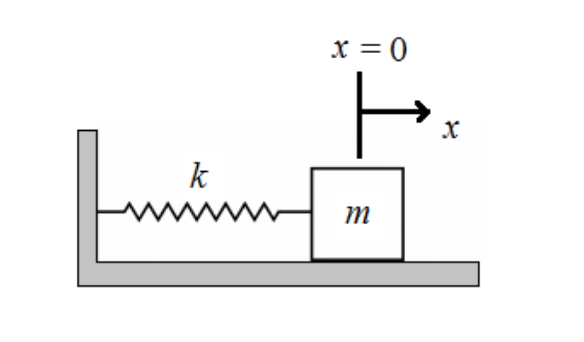


Find the equation that describes the small amplitude motion of the mass and simulate its motion

$\star$ Assuming the object is symmetric and small so that it can considered as a point mass $m$

$\star$ If we give an inertial displacement it will perform simple harmoic motion if air and other resistances on the object is neglegible and the motion is small.

$\star$ By appling,

\begin{align}
\rightarrow F=ma
\end{align}

$\star$ The position $x(t)$ of the object $P$ at a given time $t$ can be described by,

\begin{align}
 -kx(t)= m\ddot{x}(t)
\end{align}

$\star$ By the $R.H.S$ of the equation we obtain a force which exerted on the object due to its interaction. ***($Hooke's\:\:Law$)*** .

$\star$  Considering the fact that a spring is made of atoms that interact in a manner where they repulse each other when they are too close and attract when they are sufficiently away (this arises due to the electro-magnetic interactions due to the electrons and protons that makeup the particle) we may also theoretically estimate this law. These are the two fundamental ways in which forces are determined in practice.

$\star$ Since we need to get a clear equation let,

\begin{align*}
x(t) = Acos(\omega t) + Bsin(\omega t)\\
\dot{x}(t)= -A\omega sin(\omega t) + B\omega cos(\omega t)\\
\ddot{x}(t) = -\omega^2 (Acos(\omega t) + Bsin(\omega t)\:)
\end{align*}

$\star$ By observing the motion,

\begin{align}
x(0)=0 \: →\: A=0\\
V= \omega A \\
Assume\:that,\: A= Amplitude=1\:units\\
\dot{x}(0)=1\: →\: B=1
\end{align}

$\star$ So in this case it reduces to,

\begin{align}
x(t) = sin(\omega t)
\end{align}

In [27]:
#Simulating the motion of the Spring Mass System

import plotly.graph_objects as go
import numpy as np
import math
from scipy.integrate import odeint


def simulate_dy_system( dynamic_system_model, t_max, dt, x0, sys_para, fig_title, x_label, y_label):
    t = np.linspace(0, t_max, int(t_max/dt+1))
    sol = odeint(dynamic_system_model, x0, t, args=(sys_para,))
    ydot_label = 'dx/dt'

    fig = go.Figure()
    fig2 = go.Figure()
    for sol_col in sol.T[:1]:
        fig.add_trace(go.Scatter(x=t, y=sol_col, mode='lines+markers', name=f'x{sol_col + 1}', line=dict(
                color='Red',
                width=2
            )))
    for sol_col in sol.T[1:]:
        fig2.add_trace(go.Scatter(x=t, y=sol_col, mode='lines+markers', name=f'x{sol_col + 1}'))


    fig.update_layout(title=fig_title, xaxis=dict(title=x_label), yaxis=dict(title=ydot_label))
    fig.show()

    fig2.update_layout(title='', xaxis=dict(title=x_label), yaxis=dict(title=y_label))
    fig2.show()
    return t, sol, fig,fig2

def LinearSystemModel(X, t, A):
  dXdt=A @ X;
  return dXdt

m=1; k=1;
A=np.array([[0,1],[-k/m,0]]);
[t,sol,fig,fig2]=simulate_dy_system(LinearSystemModel, 10,0.01, [1,0], A, 'Spring Mass System', 'Time / t', 'x')


#Q2 -- Coupled Spring Mass System

Consider the coupled spring mass system:

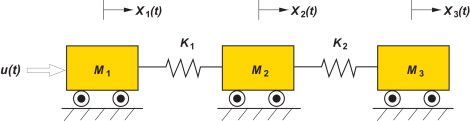

Find the equation that describes the small amplitude motion of the mass and simulate its motion

Appling Newton's equations for each of masses seperately,

\begin{align}
m_1\ddot{x}_1 = -k_1(x_1-x_2)\newline
m_2\ddot{x}_2 = -k_1(x_2-x_1) - k_1(x_2-x_3)\newline
m_3\ddot{x}_3 = -k_2(x_3-x_2)
\end{align}

Which can be written as:
\begin{align*}
M\ddot{X}+KX&=0
\end{align*}
where
\begin{align*}
X=\begin{bmatrix}x_1\\x_2\\x_3\end{bmatrix},\:\:\:\:
M=\begin{bmatrix}m_1 & 0 &0 \\0 & m_2 & 0\\ 0 & 0 & m_3\end{bmatrix},\:\:\:\:
K=\begin{bmatrix}
k_1 & -k_1 & 0\\ -k_1 & (k_1+k_2) & -k_2\\ 0 & -k_2 & k_2
\end{bmatrix}
\end{align*}


This can also be written in the dynamic system form
\begin{align*}
\dot{Y}&=AY
\end{align*}
where
\begin{align*}
Y=\begin{bmatrix}x_1\\x_2\\x_3\\\dot{x}_1\\\dot{x}_2\\\dot{x}_3\end{bmatrix},\:\:\:\:
A=\begin{bmatrix}0 & 0 & 0 & 1 &0 & 0\\ 0 & 0& 0 & 0 & 1 & 0\\0&0&0&0&0&1\\-\frac{k_1}{m_1} & \frac{k_1}{m_1} & 0 & 0 & 0 &0 \\\frac{k_1}{m_2} & -\frac{k_1+k_2}{m_2} & \frac{k_2}{m_2} &0 &0&0\\ 0 & \frac{k_2}{m_3} & -\frac{k_2}{m_3} & 0 & 0 & 0
\end{bmatrix}.
\end{align*}

Let,

$m_1=m_2=m_3=m_3=k_1=k_2=1$

### **Solving Numerically**

In [28]:
import numpy as np
import plotly.graph_objects as go

In [29]:
def LinearSystemModel(X, t, A):
  dXdt=A @ X;
  return dXdt

In [30]:
import scipy as sp
from scipy.integrate import odeint
dT=0.1
S=50
A=[1,0,0,0,0,0]
sysPara=np.array([[0,0,0,1,0,0],[0,0,0,0,1,0],[0,0,0,0,0,1],[-1,1,0,0,0,0],[1,-2, 1,0,0,0],[0,1,-1,0,0,0]])
t = np.linspace(0, S, int(S/dT+1))
sol = odeint(LinearSystemModel, A, t, args=(sysPara,));
soln=sol;
fig = go.Figure()
[nt,nS]=sol.shape;
print(int(S/dT+1))

# Add traces
for nn in range(nS-3):
            fig.add_trace(go.Scatter(x=t, y=sol[:,nn], mode='lines', name='x'+str(nn+1)))
            fig.update_layout(title="Simulation of the Displacements with t", xaxis=dict(title="Time"),yaxis=dict(title="Displacement"))


fig.show()

501
